In [6]:
from tools.functions import *

In [7]:
output = load_output("output_finnegan_2023-05-10")

In [8]:
# This calculates the hamming distances and percent match for all test patterns. 
# It uses the spike moitor ant the timepoints where the stimuli are presented

off_time = 1 # How many stimulus periods are used for recoverey period histogram

Mv_loaded = output["Mv"]
time_test_on = output["time_test_on"]
time_points_dict = output["time_points_dict"]

hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, 
                                                                                binarize = True, threshold = 100)

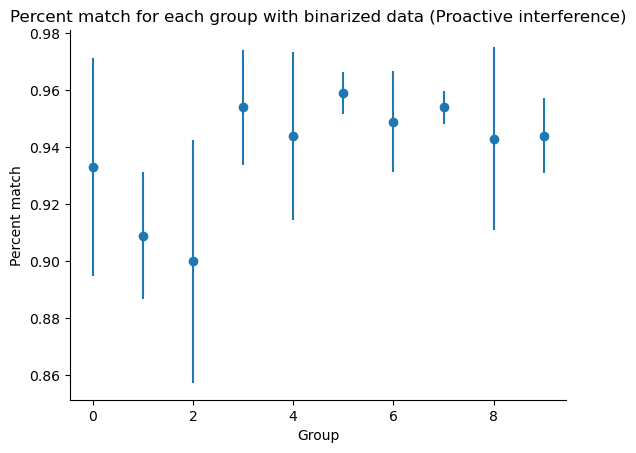

In [9]:
hd_table_between = np.array(hamming_distances[:50]).reshape(10, 5)
pm_table_between = np.array(percent_match[:50]).reshape(10, 5)
means_between = np.mean(pm_table_between, axis=1)
stds_between = np.std(pm_table_between, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_between, stds_between, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Proactive interference)")
ax.spines['right'].set_visible(False)
plt.show()



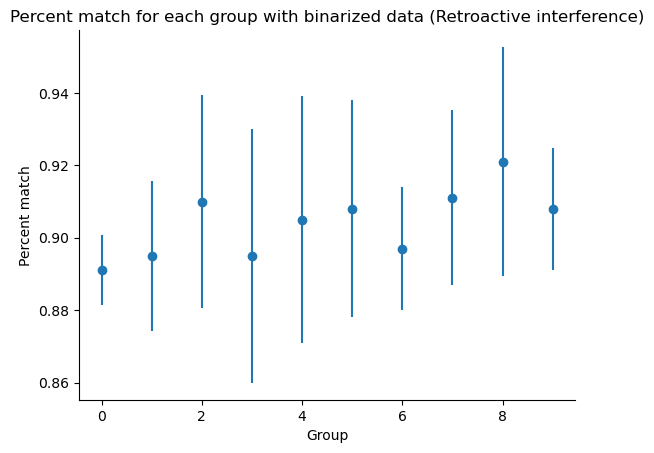

In [10]:
hd_table_within = np.array(hamming_distances[50:]).reshape(10, 5)
pm_table_within = np.array(percent_match[50:]).reshape(10, 5)
means_within = np.mean(pm_table_within, axis=1)
stds_within = np.std(pm_table_within, axis=1)

fig, ax = plt.subplots()
ax.errorbar(np.arange(10), means_within, stds_within, linestyle='None', marker='o')
ax.spines['top'].set_visible(False)
plt.xlabel("Group")
plt.ylabel("Percent match")
plt.title("Percent match for each group with binarized data (Retroactive interference)")
ax.spines['right'].set_visible(False)
plt.show()
